# APPLE


In [5]:
#intalling yfinance library
!pip install yfinance

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [7]:
# Download historical data till 14 may
ticker = "AAPL"
tickerData = yf.Ticker(ticker)
df = tickerData.history(period='1d', start='2010-1-1', end='2023-5-14')

In [9]:
#looking at the first few rows of the data
print(df.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.478688  6.511167  6.446815  6.496294  493729600   
2010-01-05 00:00:00-05:00  6.514203  6.544255  6.473223  6.507525  601904800   
2010-01-06 00:00:00-05:00  6.507526  6.533328  6.397337  6.404016  552160000   
2010-01-07 00:00:00-05:00  6.427692  6.435281  6.345733  6.392176  477131200   
2010-01-08 00:00:00-05:00  6.383677  6.435281  6.346037  6.434673  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


In [10]:
# Printing shape
print(df.shape)

(3363, 7)


In [11]:
# Check for null values in columns
null_values = df.isnull().sum()
print(null_values)


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


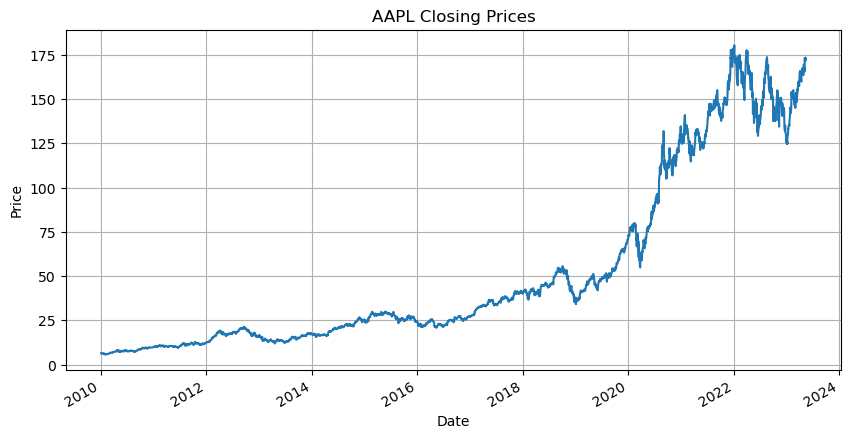

In [12]:
# ploting a graph for all closing prices
df['Close'].plot(figsize=(10,5))
plt.grid(True)
plt.title(ticker + ' Closing Prices')
plt.ylabel('Price')
plt.show()

In [19]:
# predicting using only close prices:
df = df[['Close']]
# Scaling the data:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)




In [22]:
# creating a data preparation function to create lagged variables
def create_dataset(dataset, look_back=1):
 X, Y = [], []
 for i in range(len(dataset)-look_back-1):
     a = dataset[i:(i+look_back), 0]
     X.append(a)
     Y.append(dataset[i + look_back, 0])
 return np.array(X), np.array(Y)


In [23]:
# making a dataset with a look_back period
look_back = 1
X, Y = create_dataset(scaled_data, look_back)



In [24]:
# train and test set split
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (2688, 1)
Shape of X_test: (673, 1)
Shape of Y_train: (2688,)
Shape of Y_test: (673,)


In [25]:
# Creating and training the Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [26]:
# Making predictions on the test data
lr_prediction = lr.predict(X_test)


In [27]:
# Computing RMSE
rmse = np.sqrt(mean_squared_error(Y_test, lr_prediction))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.015838895371203168


In [28]:
# Denormalizing
lr_prediction_denorm = scaler.inverse_transform(lr_prediction.reshape(-1, 1))
Y_test_denorm = scaler.inverse_transform(Y_test.reshape(-1, 1))

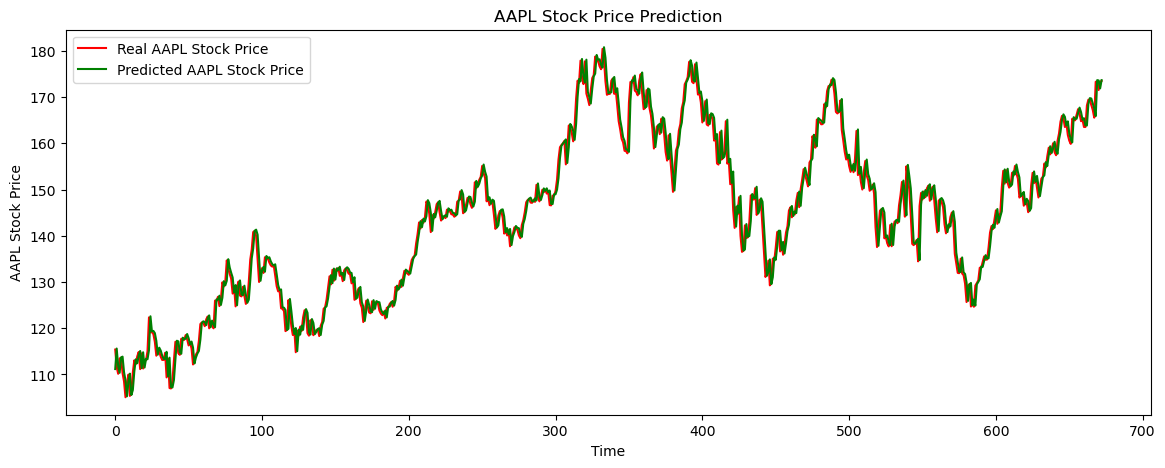

In [32]:
plt.figure(figsize=(14,5))
plt.plot(Y_test_denorm, color = 'red', label = 'Real ' + ticker + ' Stock Price')
plt.plot(lr_prediction_denorm, color = 'green', label = 'Predicted ' + ticker + ' Stock Price')
plt.title(ticker + ' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker + ' Stock Price')
plt.legend()
plt.show()

# Amazon


In [33]:
ticker = "AMZN"
tickerData = yf.Ticker(ticker)
df = tickerData.history(period='1d', start='2010-1-1', end='2023-5-14')

In [34]:
print(df.head())

                             Open    High     Low   Close     Volume  \
Date                                                                   
2010-01-04 00:00:00-05:00  6.8125  6.8305  6.6570  6.6950  151998000   
2010-01-05 00:00:00-05:00  6.6715  6.7740  6.5905  6.7345  177038000   
2010-01-06 00:00:00-05:00  6.7300  6.7365  6.5825  6.6125  143576000   
2010-01-07 00:00:00-05:00  6.6005  6.6160  6.4400  6.5000  220604000   
2010-01-08 00:00:00-05:00  6.5280  6.6840  6.4515  6.6760  196610000   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


In [35]:
print(df.shape)

(3363, 7)


In [36]:
null_values = df.isnull().sum()
print(null_values)


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


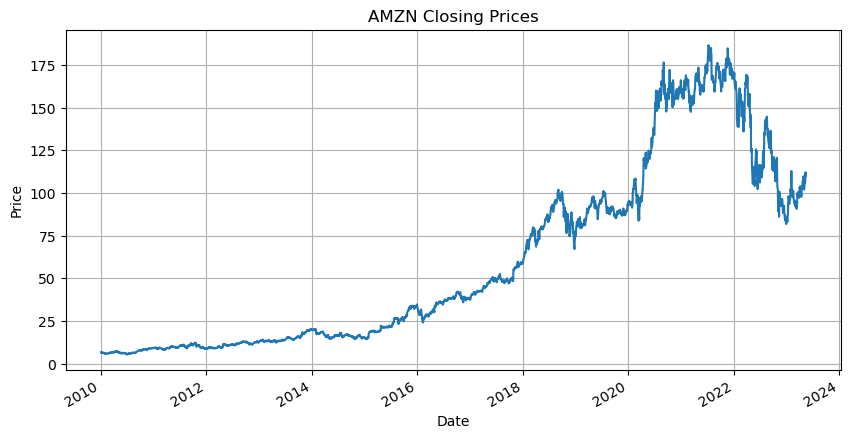

In [37]:
df['Close'].plot(figsize=(10,5))
plt.grid(True)
plt.title(ticker + ' Closing Prices')
plt.ylabel('Price')
plt.show()

In [38]:
df = df[['Close']]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)


In [39]:
def create_dataset(dataset, look_back=1):
 X, Y = [], []
 for i in range(len(dataset)-look_back-1):
     a = dataset[i:(i+look_back), 0]
     X.append(a)
     Y.append(dataset[i + look_back, 0])
 return np.array(X), np.array(Y)


In [40]:
look_back = 1
X, Y = create_dataset(scaled_data, look_back)


In [41]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (2688, 1)
Shape of X_test: (673, 1)
Shape of Y_train: (2688,)
Shape of Y_test: (673,)


In [42]:
lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [43]:
lr_prediction = lr.predict(X_test)


In [44]:
rmse = np.sqrt(mean_squared_error(Y_test, lr_prediction))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.017999742015741487


In [45]:
lr_prediction_denorm = scaler.inverse_transform(lr_prediction.reshape(-1, 1))
Y_test_denorm = scaler.inverse_transform(Y_test.reshape(-1, 1))

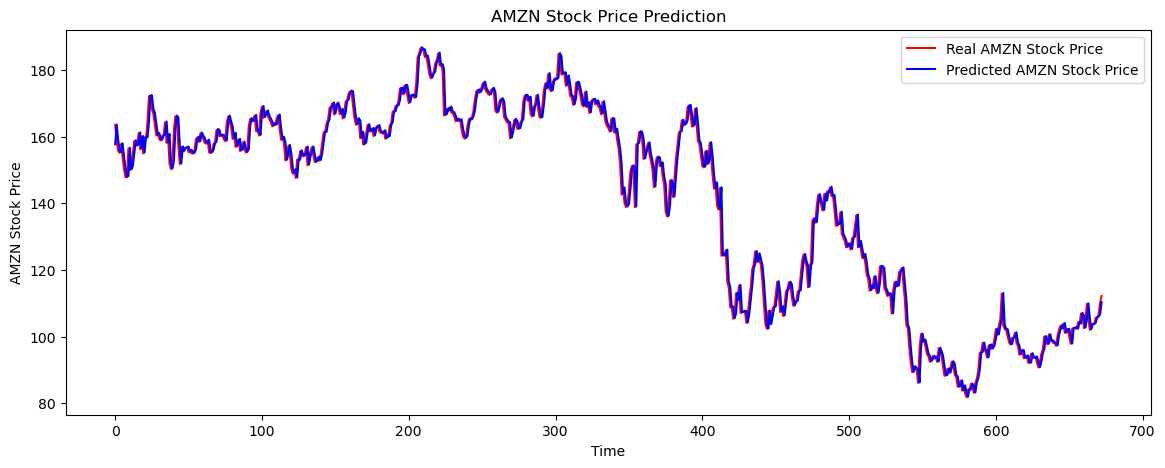

In [47]:
plt.figure(figsize=(14,5))
plt.plot(Y_test_denorm, color = 'red', label = 'Real ' + ticker + ' Stock Price')
plt.plot(lr_prediction_denorm, color = 'blue', label = 'Predicted ' + ticker + ' Stock Price')
plt.title(ticker + ' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker + ' Stock Price')
plt.legend()
plt.show()

# NETFLIX


In [62]:
ticker = "NFLX"
tickerData = yf.Ticker(ticker)
df = tickerData.history(period='1d', start='2010-1-1', end='2023-5-14')


In [63]:
print(df.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2010-01-04 00:00:00-05:00  7.931429  7.961429  7.565714  7.640000  17239600   
2010-01-05 00:00:00-05:00  7.652857  7.657143  7.258571  7.358571  23753100   
2010-01-06 00:00:00-05:00  7.361429  7.672857  7.197143  7.617143  23290400   
2010-01-07 00:00:00-05:00  7.731429  7.757143  7.462857  7.485714   9955400   
2010-01-08 00:00:00-05:00  7.498571  7.742857  7.465714  7.614286   8180900   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


In [64]:
print(df.shape)

(3363, 7)


In [65]:
null_values = df.isnull().sum()
print(null_values)


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


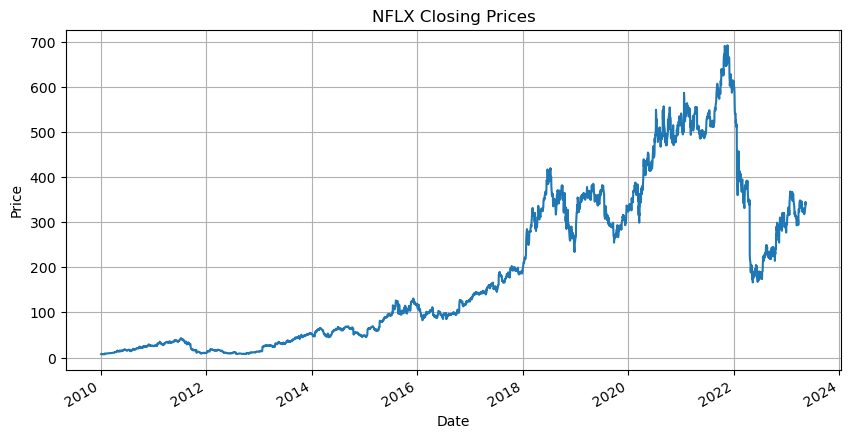

In [66]:
df['Close'].plot(figsize=(10,5))
plt.grid(True)
plt.title(ticker + ' Closing Prices')
plt.ylabel('Price')
plt.show()

In [67]:
df = df[['Close']]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)


In [68]:
def create_dataset(dataset, look_back=1):
 X, Y = [], []
 for i in range(len(dataset)-look_back-1):
     a = dataset[i:(i+look_back), 0]
     X.append(a)
     Y.append(dataset[i + look_back, 0])
 return np.array(X), np.array(Y)


In [69]:
look_back = 1
X, Y = create_dataset(scaled_data, look_back)


In [70]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (2688, 1)
Shape of X_test: (673, 1)
Shape of Y_train: (2688,)
Shape of Y_test: (673,)


In [71]:
lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [72]:
lr_prediction = lr.predict(X_test)


In [73]:
rmse = np.sqrt(mean_squared_error(Y_test, lr_prediction))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.017887853213502655


In [74]:
lr_prediction_denorm = scaler.inverse_transform(lr_prediction.reshape(-1, 1))
Y_test_denorm = scaler.inverse_transform(Y_test.reshape(-1, 1))

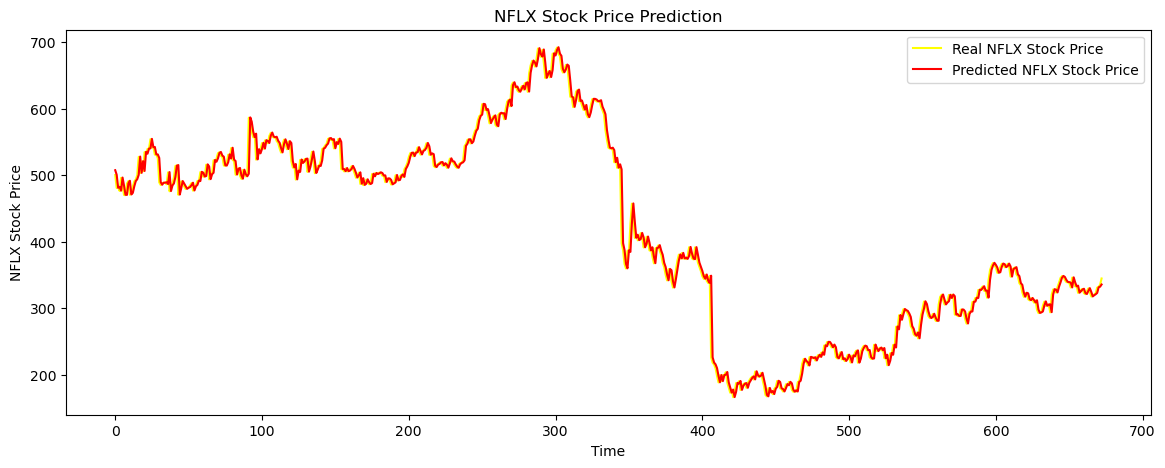

In [75]:
plt.figure(figsize=(14,5))
plt.plot(Y_test_denorm, color = 'yellow', label = 'Real ' + ticker + ' Stock Price')
plt.plot(lr_prediction_denorm, color = 'red', label = 'Predicted ' + ticker + ' Stock Price')
plt.title(ticker + ' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker + ' Stock Price')
plt.legend()
plt.show()

# TESLA


In [76]:
ticker = "TSLA"
tickerData = yf.Ticker(ticker)
df = tickerData.history(period='1d', start='2010-1-1', end='2023-5-14')


In [77]:
print(df.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [78]:
print(df.shape)

(3241, 7)


In [79]:
null_values = df.isnull().sum()
print(null_values)


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


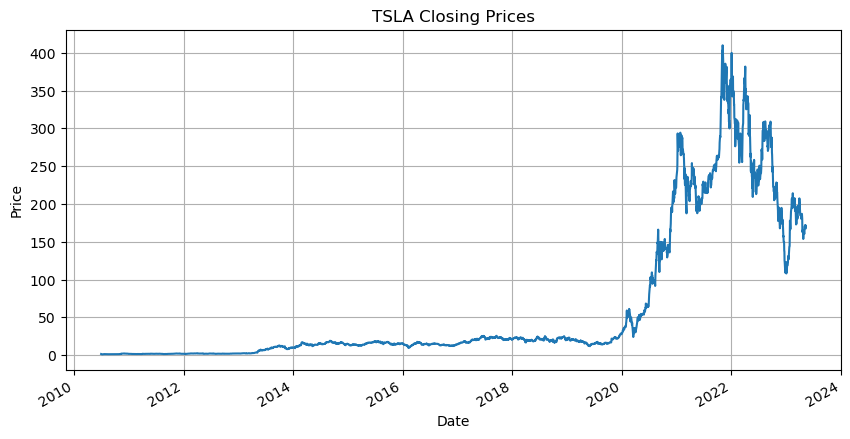

In [80]:
df['Close'].plot(figsize=(10,5))
plt.grid(True)
plt.title(ticker + ' Closing Prices')
plt.ylabel('Price')
plt.show()

In [81]:
look_back = 1
X, Y = create_dataset(scaled_data, look_back)


In [82]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (2688, 1)
Shape of X_test: (673, 1)
Shape of Y_train: (2688,)
Shape of Y_test: (673,)


In [83]:
lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [84]:
lr_prediction = lr.predict(X_test)


In [85]:
rmse = np.sqrt(mean_squared_error(Y_test, lr_prediction))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.017887853213502655


In [86]:
lr_prediction_denorm = scaler.inverse_transform(lr_prediction.reshape(-1, 1))
Y_test_denorm = scaler.inverse_transform(Y_test.reshape(-1, 1))

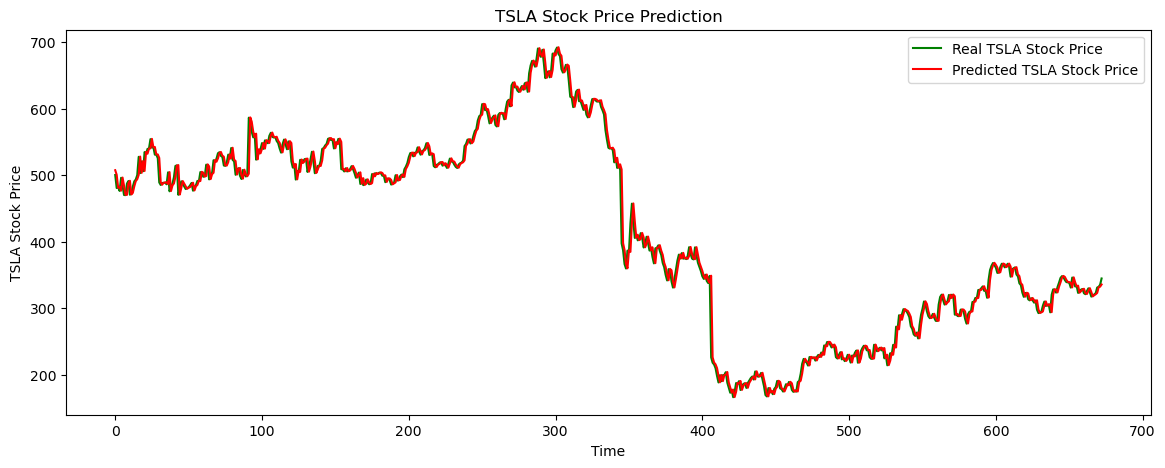

In [87]:
plt.figure(figsize=(14,5))
plt.plot(Y_test_denorm, color = 'green', label = 'Real ' + ticker + ' Stock Price')
plt.plot(lr_prediction_denorm, color = 'red', label = 'Predicted ' + ticker + ' Stock Price')
plt.title(ticker + ' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker + ' Stock Price')
plt.legend()
plt.show()